<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/Train%2BInference%20(ImageNet%20statistics%2C%20pretrained%2C%20full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Oct  6 01:21:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !mkdir open_data
!unzip -uq "/content/drive/MyDrive/DACON_2021_recognize_traffic_signal_motion/new_open.zip" -d "/content/"

In [4]:
!cp /content/drive/MyDrive/pytorch_python/dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_augmentation.py .
!cp /content/drive/MyDrive/pytorch_python/specific_dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_train.py .
!cp /content/drive/MyDrive/pytorch_python/train.py .

In [5]:
from dataset import *
from train import *

import matplotlib.pyplot as plt

import torch, torchvision
import torchvision.transforms as transforms

In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
batch_size = 32


train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_dataset = TrainDataset(transform=train_transform)
val_dataset = ValDataset(transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [8]:
model = Baseline(model='resnet18', num_classes=len(train_dataset.label_info), print_freq=5, save=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [9]:
epochs = 5
lr = 0.0005
weight_decay = 0.00001

In [10]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 5.331439, Test Loss : 5.100182, Train Acc : 0.000000, Test Acc : 4.008152
Best Model Saved
Iteration : 6 - Train Loss : 4.383166, Test Loss : 4.887671, Train Acc : 18.750000, Test Acc : 9.510870
Best Model Saved
Iteration : 11 - Train Loss : 4.655477, Test Loss : 4.555688, Train Acc : 9.375000, Test Acc : 13.043478
Best Model Saved
Iteration : 16 - Train Loss : 4.032270, Test Loss : 4.111346, Train Acc : 28.125000, Test Acc : 17.595109
Best Model Saved
Iteration : 21 - Train Loss : 3.794269, Test Loss : 3.936154, Train Acc : 12.500000, Test Acc : 21.059783
Best Model Saved
Iteration : 26 - Train Loss : 3.509107, Test Loss : 3.348192, Train Acc : 28.125000, Test Acc : 29.008152
Best Model Saved
Iteration : 31 - Train Loss : 3.088334, Test Loss : 3.114473, Train Acc : 37.500000, Test Acc : 37.500000
Best Model Saved
Iteration : 36 - Train Loss : 2.920362, Test Loss : 2.802448, Train Acc : 43.750000, Test Acc : 40.081522
Bes

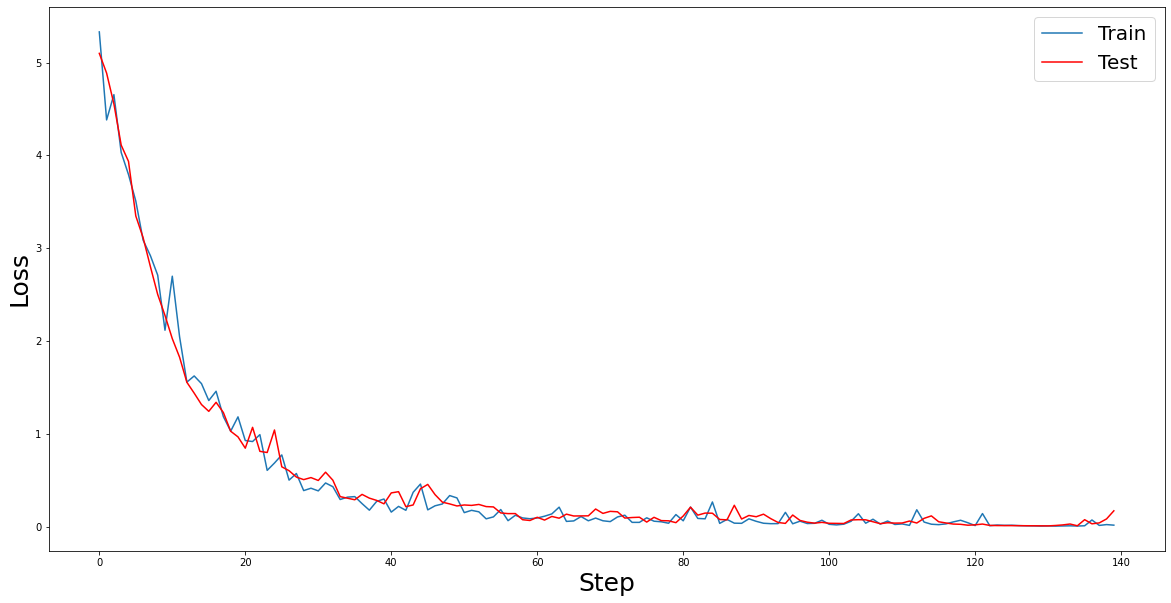

In [11]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

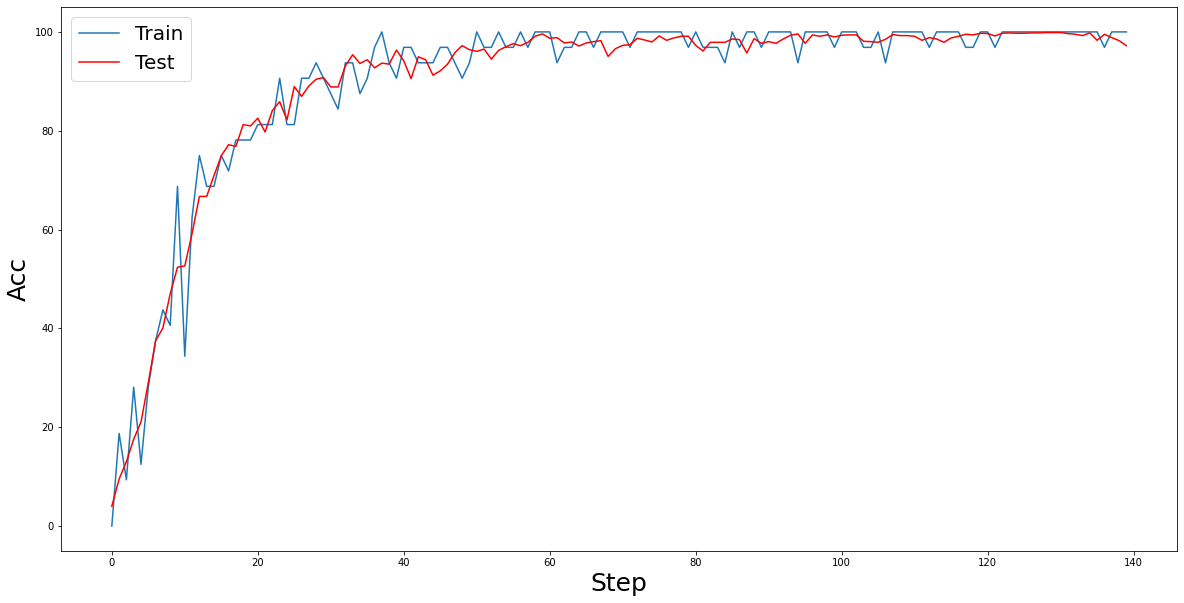

In [12]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()

In [13]:
import os, json, PIL
import pandas as pd

In [14]:
model = Baseline(model='resnet18', num_classes=157)
model.model.load_state_dict(torch.load('./4_90.pt'))
model.model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
test_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


data_dir = './test/'

predictions = []
with torch.no_grad():
    for num in sorted(os.listdir(data_dir)):
        with open(data_dir + '{}/{}.json'.format(num, num), 'r') as j:
            temp = json.load(j)
            imgs = []
            for info in temp['annotations']:
                img_dir = data_dir + '{}/{}.png'.format(num, info['image_id'])
                img = PIL.Image.open(img_dir).convert('RGB')
                img = test_transform(img)
                imgs.append(img)
            imgs = torch.stack(imgs).cuda()
            prediction = torch.nn.Softmax(dim=1)(model.model(imgs))
            prediction = torch.mean(prediction, dim=0)
            #if torch.max(prediction) > 0.9:
            #    prediction[torch.argmax(prediction)] = 1
            #    prediction[prediction < 1] = 0
            
            if torch.sum(prediction) != 1: print(torch.sum(prediction))
            predictions.append(prediction.cpu().numpy())

tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1

In [16]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission.iloc[:,1:] = predictions
display(sample_submission.head())
sample_submission.to_csv('./ImageNetStat_4_90_threshno.csv', index=False)

,Image_Path,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14,Label_15,Label_16,Label_17,Label_18,Label_19,Label_22,Label_23,Label_25,Label_26,Label_27,Label_28,Label_29,Label_31,Label_32,Label_34,Label_35,Label_36,Label_37,Label_39,Label_40,Label_41,Label_42,Label_43,Label_44,...,Label_142,Label_143,Label_144,Label_145,Label_146,Label_147,Label_148,Label_149,Label_150,Label_151,Label_153,Label_154,Label_155,Label_156,Label_157,Label_158,Label_159,Label_160,Label_161,Label_162,Label_163,Label_165,Label_167,Label_168,Label_169,Label_171,Label_172,Label_173,Label_174,Label_175,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195
0,./test\649,0.446346,0.024354,0.000817,0.001791,0.000238,0.006918,0.301992,0.000944,0.000422,0.000712,0.007249,0.001179,0.000409,0.000370,0.000071,0.000186,0.001358,0.001830,0.000240,0.000315,0.001492,0.012762,0.001430,0.002290,0.008444,0.007272,0.000942,4.442288e-04,0.000453,0.000344,0.041688,0.000748,0.000654,0.000384,0.000923,0.000632,0.001949,0.000434,0.001043,...,0.001855,0.000438,0.000250,5.910272e-03,0.000463,1.714984e-04,0.000603,0.000782,0.001085,0.000251,0.000710,2.191886e-04,0.000384,0.000095,0.000729,0.001074,0.000382,0.000670,0.000315,0.000860,0.002020,0.000168,0.001854,0.000568,0.000331,0.000573,0.000367,0.001024,3.584003e-04,2.532863e-04,0.000598,0.000178,0.000576,0.000108,0.000176,0.000363,2.489529e-04,0.000077,9.670572e-05,2.613702e-04
1,./test\650,0.000065,0.000028,0.000011,0.000012,0.000002,0.000009,0.000062,0.000007,0.000012,0.000015,0.995274,0.000581,0.000046,0.000092,0.000005,0.000028,0.000758,0.000031,0.000002,0.000007,0.000023,0.000023,0.000005,0.000004,0.000006,0.000051,0.000005,6.872833e-06,0.000012,0.000007,0.000036,0.000011,0.000006,0.000014,0.000019,0.000003,0.000488,0.000026,0.000003,...,0.000022,0.000007,0.000002,4.554787e-06,0.000007,6.332399e-07,0.000011,0.000003,0.000001,0.000005,0.000013,7.773225e-07,0.000005,0.000003,0.000005,0.000007,0.000009,0.000018,0.000021,0.000006,0.000015,0.000001,0.000091,0.000004,0.000007,0.000011,0.000006,0.000004,1.779066e-06,6.534017e-07,0.000002,0.000004,0.000004,0.000010,0.000002,0.000005,1.855915e-06,0.000005,9.355502e-07,1.127273e-06
2,./test\651,0.000255,0.000607,0.000154,0.000113,0.000011,0.000018,0.000032,0.000051,0.000041,0.000029,0.006050,0.962637,0.013451,0.000256,0.000012,0.000023,0.000071,0.004521,0.000035,0.000030,0.000055,0.000026,0.000015,0.000014,0.000025,0.000023,0.000004,7.107487e-06,0.000073,0.000056,0.000035,0.000038,0.000034,0.000024,0.000289,0.000035,0.000108,0.000032,0.000010,...,0.000111,0.000023,0.000011,6.912542e-05,0.000039,7.465170e-06,0.000035,0.000032,0.000007,0.000017,0.000172,4.424532e-06,0.000022,0.000017,0.000038,0.000033,0.000085,0.000015,0.000426,0.000036,0.000042,0.000010,0.000753,0.000030,0.000064,0.000025,0.000071,0.000015,2.554982e-05,4.561363e-05,0.000031,0.000021,0.000026,0.000007,0.000011,0.000027,1.681715e-05,0.000047,1.444349e-05,1.369846e-05
3,./test\652,0.000178,0.000803,0.000137,0.000093,0.000003,0.000006,0.000023,0.000036,0.000019,0.000016,0.006654,0.977504,0.005818,0.000131,0.000004,0.000013,0.000039,0.003113,0.000015,0.000012,0.000022,0.000011,0.000005,0.000006,0.000016,0.000011,0.000002,2.851014e-06,0.000029,0.000023,0.000011,0.000015,0.000016,0.000011,0.000096,0.000012,0.000039,0.000011,0.000003,...,0.000063,0.000012,0.000004,2.825391e-05,0.000014,2.070764e-06,0.000016,0.000013,0.000003,0.000007,0.000048,1.482255e-06,0.000009,0.000007,0.000017,0.000014,0.000044,0.000005,0.000366,0.000011,0.000015,0.000004,0.000322,0.000013,0.000033,0.000017,0.000025,0.000010,8.930650e-06,1.756480e-05,0.000015,0.000010,0.000011,0.000003,0.000004,0.000011,4.661480e-06,0.000021,4.018057e-06,5.966293e-06
4,./test\653,0.000008,0.000028,0.000788,0.000218,0.000006,0.000003,0.000001,0.000007,0.000079,0.000005,0.000029,0.000793,0.993729,0.002456,0.000011,0.000002,0.000003,0.000019,0.000529,0.0